创建并可视化稀疏体素网格...


/tmp/ipykernel_3835382/1338090407.py:79: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:79: UserWarning: Glyph 31232 (\N{CJK UNIFIED IDEOGRAPH-7A00}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:79: UserWarning: Glyph 30095 (\N{CJK UNIFIED IDEOGRAPH-758F}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:79: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:79: UserWarning: Glyph 32032 (\N{CJK UNIFIED IDEOGRAPH-7D20}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:79: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:79: UserWarning: Glyph 26684 (\N{CJK UNIFIED IDEOGRAPH-683C}) missing from curren

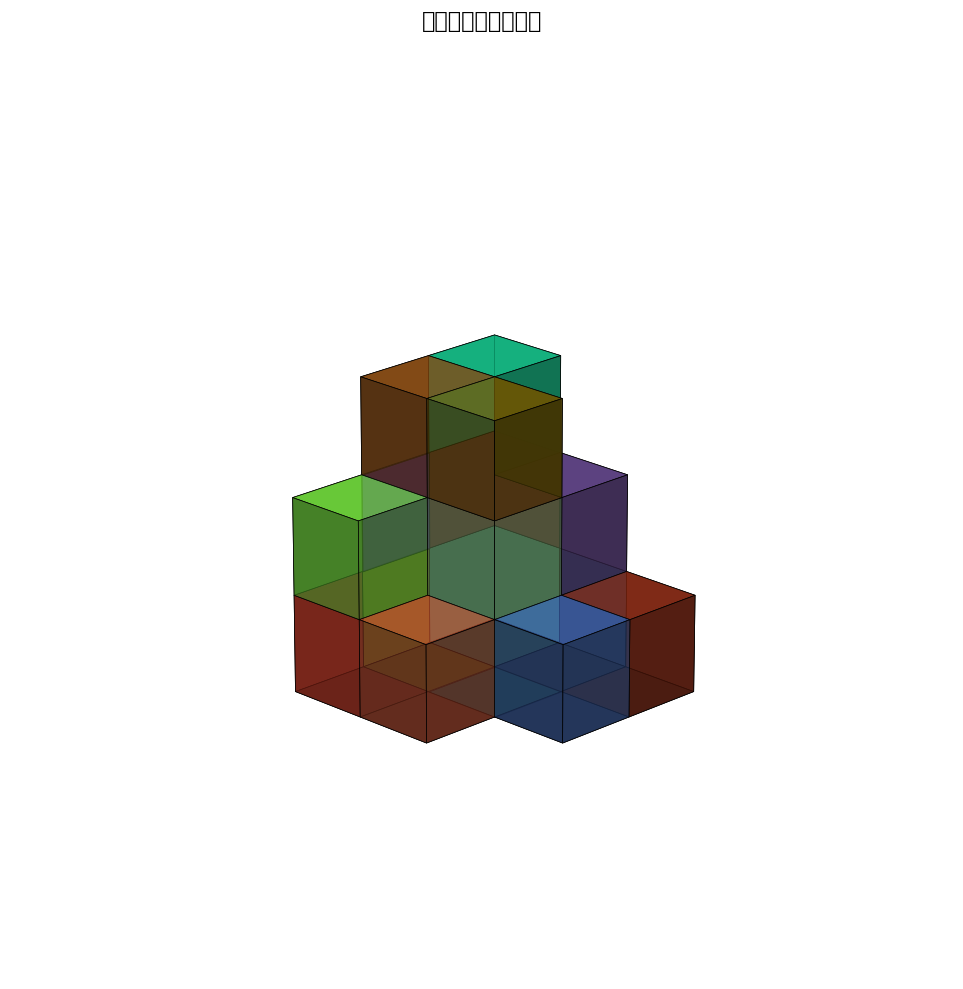

创建自定义体素网格...


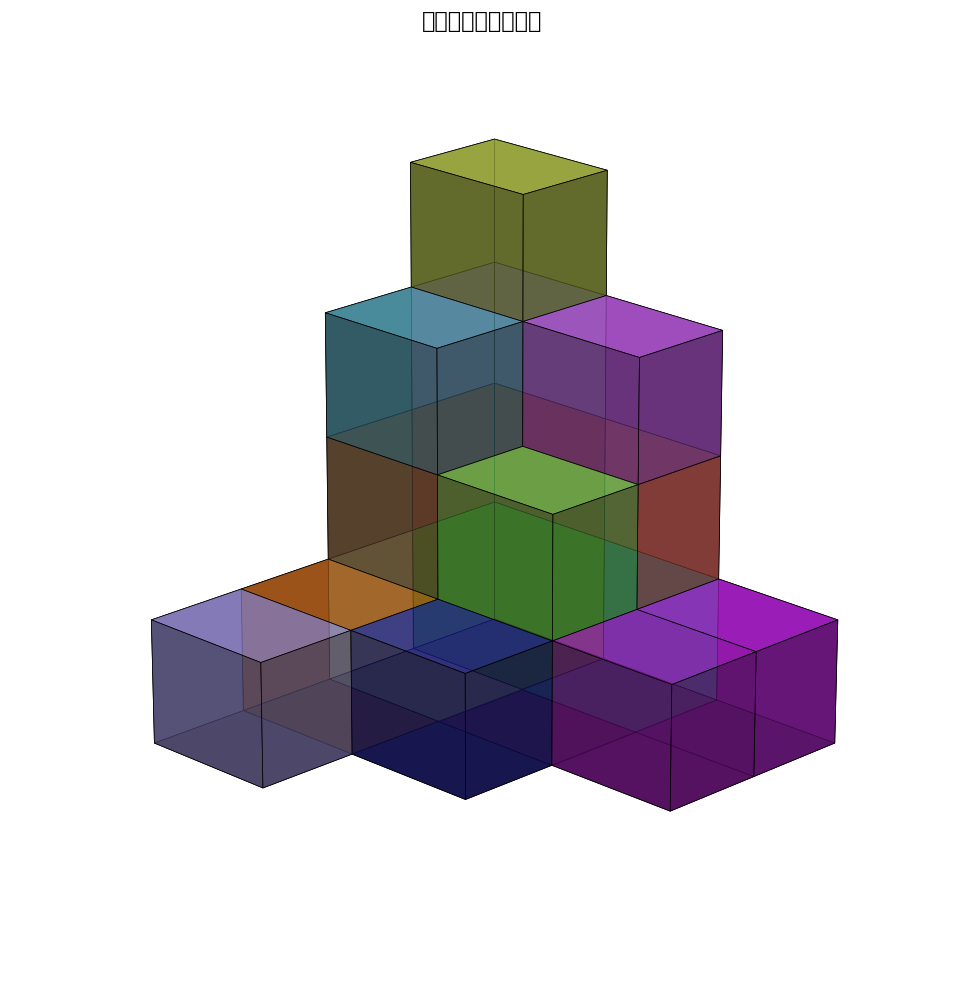

创建渐变色体素网格...


/tmp/ipykernel_3835382/1338090407.py:124: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:124: UserWarning: Glyph 28176 (\N{CJK UNIFIED IDEOGRAPH-6E10}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:124: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:124: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:124: UserWarning: Glyph 20307 (\N{CJK UNIFIED IDEOGRAPH-4F53}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:124: UserWarning: Glyph 32032 (\N{CJK UNIFIED IDEOGRAPH-7D20}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/1338090407.py:124: UserWarning: Glyph 32593 (\N{CJK UNIFIED IDEOGRAPH-7F51}) missing from

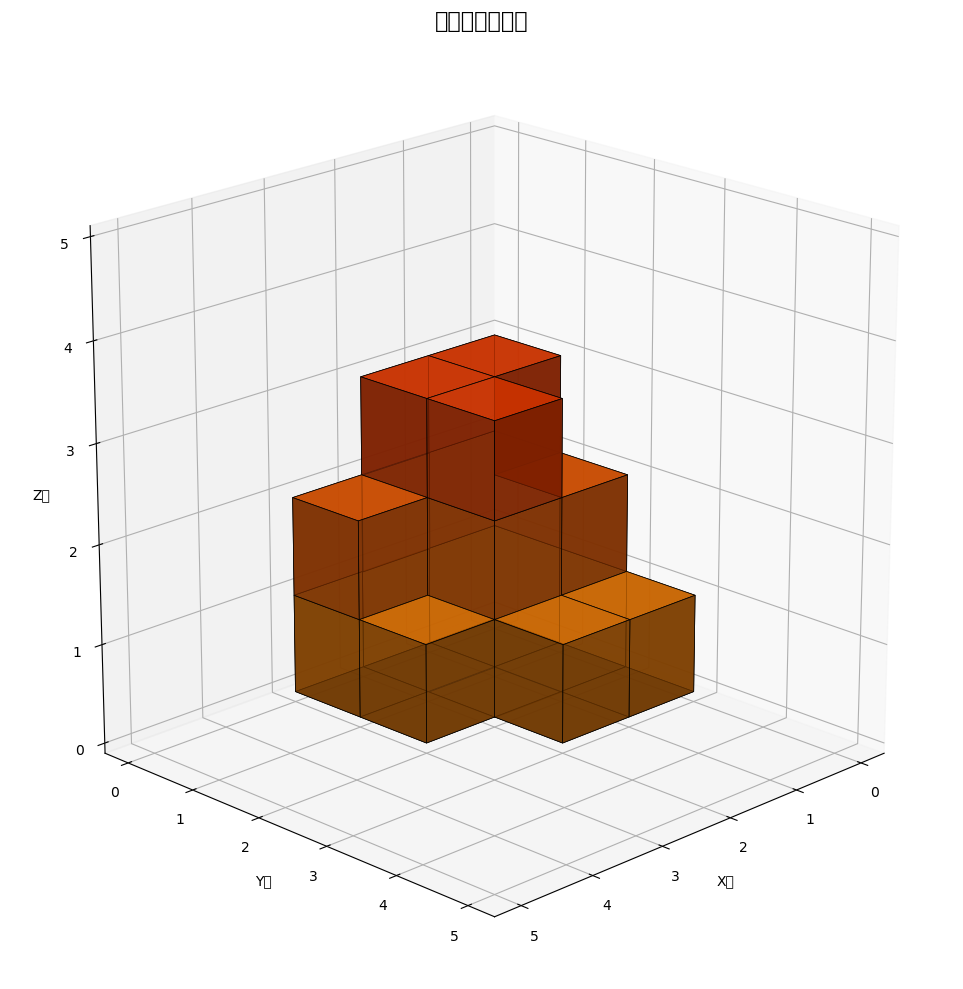


网格统计信息:
网格大小: (5, 5, 5)
活跃体素数量: 16
总体素数量: 125
稀疏度: 87.20%


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def create_sparse_voxel_grid():
    """创建一个稀疏体素网格，模拟图片中的结构"""
    # 定义体素网格的大小
    grid_size = (5, 5, 5)
    
    # 创建一个布尔数组表示哪些体素是活跃的
    voxels = np.zeros(grid_size, dtype=bool)
    
    # 根据图片结构设置活跃体素
    # 底层
    voxels[0:2, 0:3, 0] = True
    voxels[2, 0:2, 0] = True
    
    # 中层
    voxels[0:2, 0:2, 1] = True
    voxels[2, 0, 1] = True
    
    # 顶层
    voxels[0, 0, 2] = True
    voxels[1, 0:2, 2] = True
    
    return voxels

def generate_random_colors(voxels, alpha=0.8):
    """为每个活跃的体素生成随机颜色"""
    colors = np.zeros(voxels.shape + (4,))
    
    # 为每个位置生成随机颜色
    for i in range(voxels.shape[0]):
        for j in range(voxels.shape[1]):
            for k in range(voxels.shape[2]):
                # 生成随机RGB颜色
                r = np.random.rand()
                g = np.random.rand()
                b = np.random.rand()
                colors[i, j, k] = [r, g, b, alpha]
    
    return colors

def visualize_voxel_grid(voxels, colors=None, alpha=0.8, random_colors=True):
    """可视化体素网格"""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # 如果没有指定颜色，使用橙色
    if colors is None:
        if random_colors:
            # 为每个体素生成随机颜色
            colors = generate_random_colors(voxels, alpha)
        else:
            colors = np.full(voxels.shape + (4,), [1.0, 0.5, 0.0, alpha])  # 橙色
    
    # 绘制体素
    ax.voxels(voxels, facecolors=colors, edgecolors='black', linewidth=0.5)
    
    # 设置坐标轴标签
    ax.set_xlabel('X轴')
    ax.set_ylabel('Y轴')
    ax.set_zlabel('Z轴')
    
    # 设置标题
    ax.set_title('稀疏体素网格可视化', fontsize=16)
    
    # 设置视角
    ax.view_init(elev=20, azim=45)
    
    # 设置坐标轴比例
    ax.set_box_aspect([1,1,1])
    
    ax.grid(False)
    ax.axis('off')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    plt.tight_layout()
    plt.show()

def create_custom_voxel_grid(voxel_positions):
    """根据给定的位置列表创建体素网格"""
    if not voxel_positions:
        return np.zeros((1, 1, 1), dtype=bool)
    
    # 找到最大坐标来确定网格大小
    max_coords = np.max(voxel_positions, axis=0) + 1
    voxels = np.zeros(max_coords, dtype=bool)
    
    # 设置活跃体素
    for pos in voxel_positions:
        voxels[tuple(pos)] = True
    
    return voxels

def visualize_with_gradient_colors(voxels):
    """使用渐变色可视化体素网格"""
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # 创建渐变色
    colors = np.empty(voxels.shape + (4,))
    
    # 根据z坐标设置颜色渐变（从橙色到红色）
    for z in range(voxels.shape[2]):
        ratio = z / max(1, voxels.shape[2] - 1)
        # 从橙色(1, 0.5, 0)渐变到红色(1, 0, 0)
        r = 1.0
        g = 0.5 * (1 - ratio)
        b = 0.0
        alpha = 0.8
        colors[:, :, z] = [r, g, b, alpha]
    
    ax.voxels(voxels, facecolors=colors, edgecolors='black', linewidth=0.5)
    
    ax.set_xlabel('X轴')
    ax.set_ylabel('Y轴')
    ax.set_zlabel('Z轴')
    ax.set_title('渐变色体素网格', fontsize=16)
    ax.view_init(elev=20, azim=45)
    ax.set_box_aspect([1,1,1])
    
    plt.tight_layout()
    plt.show()

# 主程序
if __name__ == "__main__":
    np.random.seed(42)  # 设置随机种子以获得可重复的结果
    # 示例1: 基本的稀疏体素网格
    print("创建并可视化稀疏体素网格...")
    voxel_grid = create_sparse_voxel_grid()
    visualize_voxel_grid(voxel_grid)
    
    # 示例2: 自定义体素位置
    print("创建自定义体素网格...")
    custom_positions = [
        [0, 0, 0], [1, 0, 0], [2, 0, 0], [3, 0, 0],
        [0, 1, 0], [1, 1, 0], [2, 1, 0],
        [0, 2, 0], [1, 2, 0],
        [0, 0, 1], [1, 0, 1], [0, 1, 1], [1, 1, 1],
        [0, 0, 2], [1, 0, 2], [0, 1, 2],
        [0, 0, 3],
    ]
    custom_grid = create_custom_voxel_grid(custom_positions)
    visualize_voxel_grid(custom_grid)
    
    # 示例3: 渐变色可视化
    print("创建渐变色体素网格...")
    visualize_with_gradient_colors(voxel_grid)
    
    # 打印网格信息
    active_voxels = np.sum(voxel_grid)
    total_voxels = np.prod(voxel_grid.shape)
    sparsity = 1 - (active_voxels / total_voxels)
    
    print(f"\n网格统计信息:")
    print(f"网格大小: {voxel_grid.shape}")
    print(f"活跃体素数量: {active_voxels}")
    print(f"总体素数量: {total_voxels}")
    print(f"稀疏度: {sparsity:.2%}")

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont

高斯分布可视化演示
1. 绘制标准高斯分布...


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont

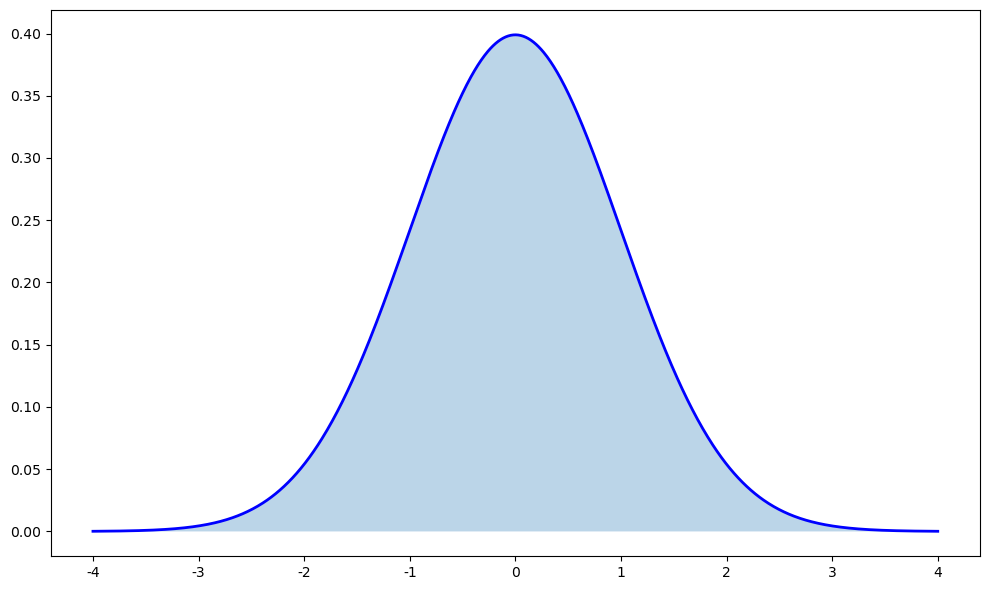

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont

2. 绘制多个不同参数的高斯分布...


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont

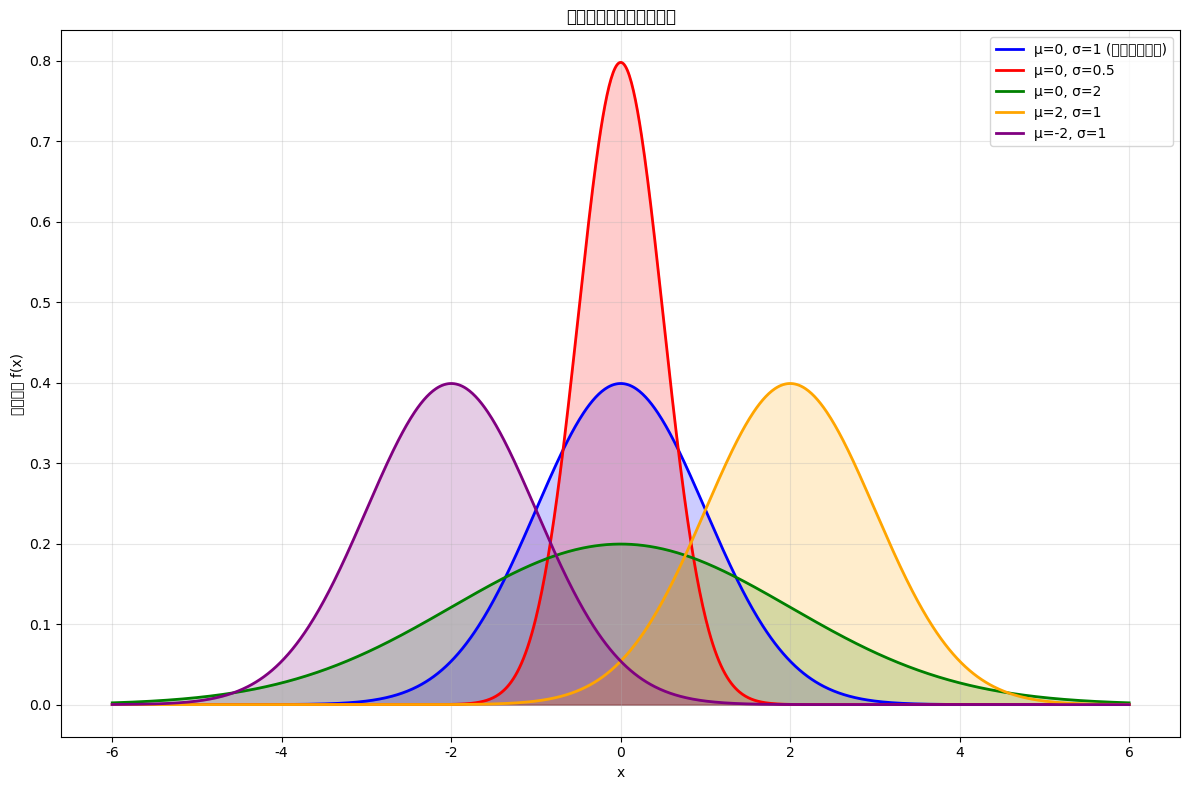

findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont

3. 绘制68-95-99.7规则演示...


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont

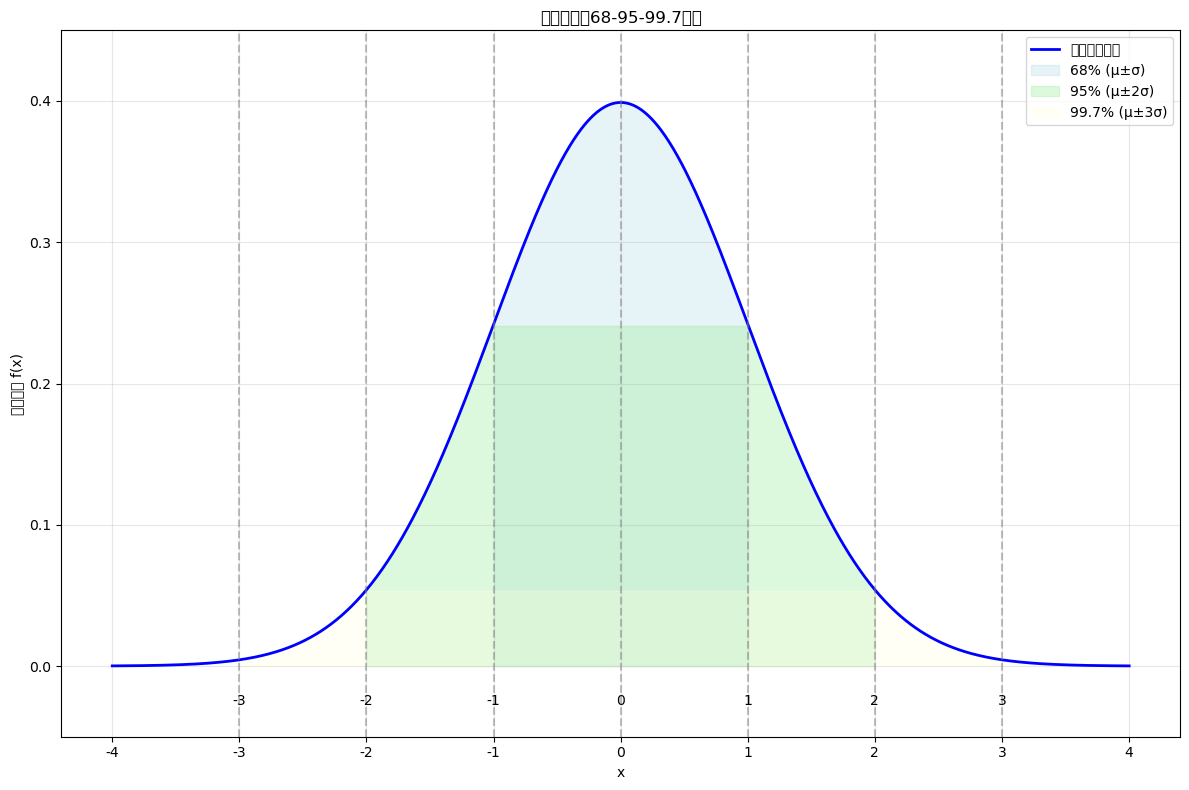

4. 绘制二维高斯分布3D图...


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei, Arial Unicode MS
/tmp/ipykernel_3835382/2980457934.py:150: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/2980457934.py:150: UserWarning: Glyph 32500 (\N{CJK UNIFIED IDEOGRAPH-7EF4}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/2980457934.py:150: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  plt.tight_layout()
/tmp/ipykernel_3835382/2980457934.py:150: UserWarning: Glyph

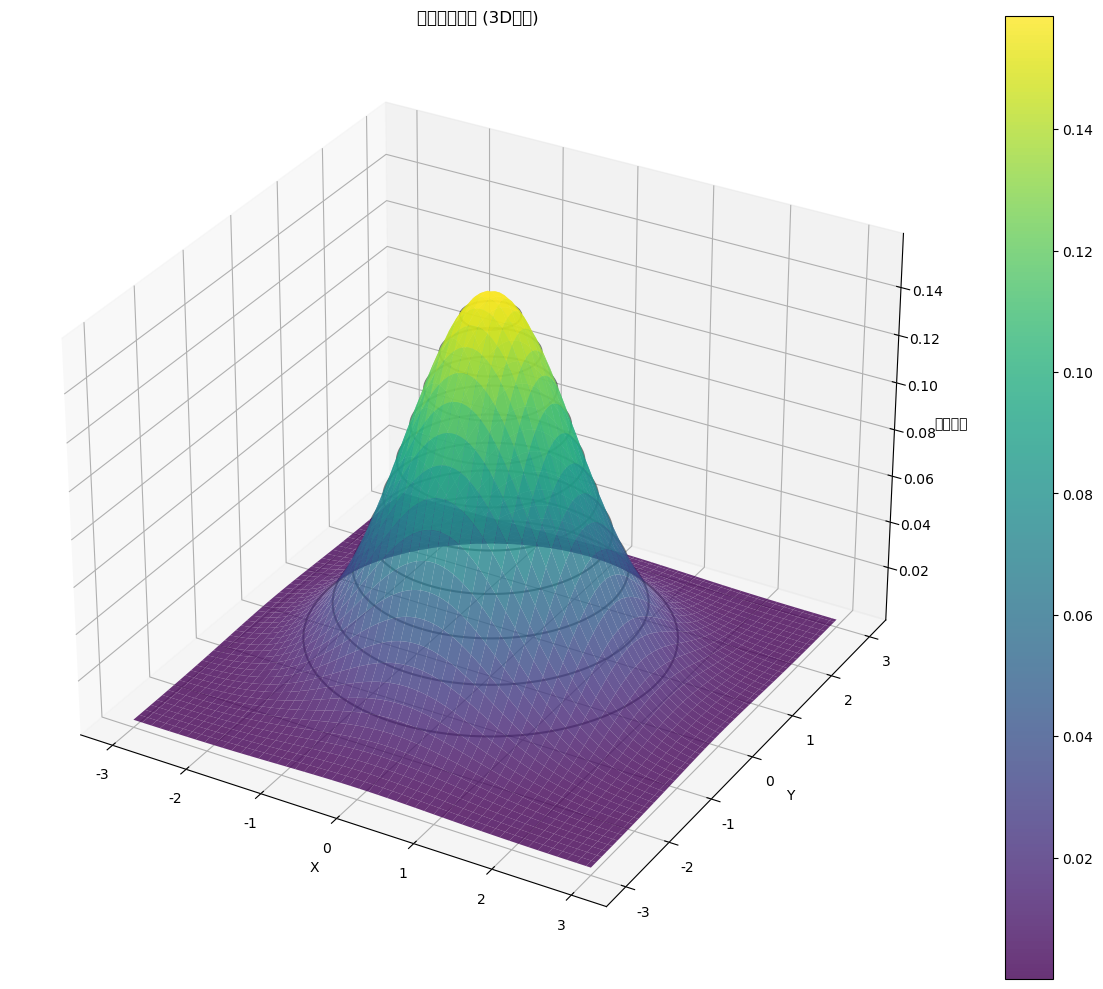

高斯分布演示:
标准正态分布 (μ=0, σ=1):
- 68%的数据在 [-1.0, 1.0] 范围内
- 95%的数据在 [-2.0, 2.0] 范围内
- 99.7%的数据在 [-3.0, 3.0] 范围内

概率计算示例:
- P(X ≤ 0) = 0.5000
- P(-1 ≤ X ≤ 1) = 0.6827
- P(X > 2) = 0.0228

演示完成！


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

def gaussian_pdf(x, mu, sigma):
    """计算高斯分布概率密度函数"""
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def plot_single_gaussian(mu=0, sigma=1, x_range=(-4, 4)):
    """绘制单个高斯分布曲线"""
    # 生成x值
    x = np.linspace(x_range[0], x_range[1], 1000)
    
    # 计算概率密度
    y = gaussian_pdf(x, mu, sigma)
    
    # 创建图形
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', linewidth=2, label=f'μ={mu}, σ={sigma}')
    plt.fill_between(x, y, alpha=0.3)
    
    # 标记重要点
    # plt.axvline(mu, color='red', linestyle='--', alpha=0.7, label=f'均值 μ={mu}')
    # plt.axvline(mu + sigma, color='orange', linestyle='--', alpha=0.7, label=f'μ+σ={mu+sigma}')
    # plt.axvline(mu - sigma, color='orange', linestyle='--', alpha=0.7, label=f'μ-σ={mu-sigma}')
    
    # 设置标签和标题
    # plt.xlabel('x')
    # plt.ylabel('概率密度 f(x)')
    # plt.title(f'高斯分布曲线 (正态分布)\nμ={mu}, σ={sigma}')
    # plt.legend()
    plt.grid(False)
    plt.xlabel('')
    plt.ylabel('')
    
    plt.tight_layout()
    plt.show()

def plot_multiple_gaussians():
    """绘制多个不同参数的高斯分布"""
    x = np.linspace(-6, 6, 1000)
    
    # 定义不同的参数
    params = [
        (0, 1, 'μ=0, σ=1 (标准正态分布)'),
        (0, 0.5, 'μ=0, σ=0.5'),
        (0, 2, 'μ=0, σ=2'),
        (2, 1, 'μ=2, σ=1'),
        (-2, 1, 'μ=-2, σ=1')
    ]
    
    plt.figure(figsize=(12, 8))
    
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    
    for i, (mu, sigma, label) in enumerate(params):
        y = gaussian_pdf(x, mu, sigma)
        plt.plot(x, y, color=colors[i], linewidth=2, label=label)
        plt.fill_between(x, y, alpha=0.2, color=colors[i])
    
    plt.xlabel('x')
    plt.ylabel('概率密度 f(x)')
    plt.title('不同参数的高斯分布比较')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def plot_gaussian_with_areas():
    """绘制高斯分布并标记不同区域的面积"""
    mu, sigma = 0, 1
    x = np.linspace(-4, 4, 1000)
    y = gaussian_pdf(x, mu, sigma)
    
    plt.figure(figsize=(12, 8))
    
    # 主曲线
    plt.plot(x, y, 'b-', linewidth=2, label='标准正态分布')
    
    # 68-95-99.7规则的区域着色
    # 68% (μ±σ)
    x1 = x[(x >= mu - sigma) & (x <= mu + sigma)]
    y1 = gaussian_pdf(x1, mu, sigma)
    plt.fill_between(x1, y1, alpha=0.3, color='lightblue', label='68% (μ±σ)')
    
    # 95% (μ±2σ)
    x2 = x[(x >= mu - 2*sigma) & (x <= mu + 2*sigma) & ((x < mu - sigma) | (x > mu + sigma))]
    y2 = gaussian_pdf(x2, mu, sigma)
    plt.fill_between(x2, y2, alpha=0.3, color='lightgreen', label='95% (μ±2σ)')
    
    # 99.7% (μ±3σ)
    x3 = x[(x >= mu - 3*sigma) & (x <= mu + 3*sigma) & ((x < mu - 2*sigma) | (x > mu + 2*sigma))]
    y3 = gaussian_pdf(x3, mu, sigma)
    plt.fill_between(x3, y3, alpha=0.3, color='lightyellow', label='99.7% (μ±3σ)')
    
    # 标记线
    for i in range(-3, 4):
        plt.axvline(mu + i*sigma, color='gray', linestyle='--', alpha=0.5)
        plt.text(mu + i*sigma, -0.02, f'{mu + i*sigma}', ha='center', va='top')
    
    plt.xlabel('x')
    plt.ylabel('概率密度 f(x)')
    plt.title('高斯分布的68-95-99.7规则')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.ylim(-0.05, 0.45)
    
    plt.tight_layout()
    plt.show()

def plot_3d_gaussian():
    """绘制二维高斯分布的3D图"""
    # 创建网格
    x = np.linspace(-3, 3, 100)
    y = np.linspace(-3, 3, 100)
    X, Y = np.meshgrid(x, y)
    
    # 二维高斯分布参数
    mu_x, mu_y = 0, 0
    sigma_x, sigma_y = 1, 1
    
    # 计算二维高斯分布
    Z = (1 / (2 * np.pi * sigma_x * sigma_y)) * np.exp(
        -0.5 * ((X - mu_x)**2 / sigma_x**2 + (Y - mu_y)**2 / sigma_y**2)
    )
    
    # 创建3D图
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # 绘制表面
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    
    # 绘制等高线
    ax.contour(X, Y, Z, levels=10, colors='black', alpha=0.5, linestyles='-')
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('概率密度')
    ax.set_title('二维高斯分布 (3D视图)')
    
    # 添加颜色条
    plt.colorbar(surf)
    
    plt.tight_layout()
    plt.show()

def interactive_gaussian_demo():
    """演示高斯分布的性质"""
    print("高斯分布演示:")
    print("=" * 50)
    
    # 计算一些统计值
    mu, sigma = 0, 1
    
    print(f"标准正态分布 (μ={mu}, σ={sigma}):")
    print(f"- 68%的数据在 [{mu-sigma:.1f}, {mu+sigma:.1f}] 范围内")
    print(f"- 95%的数据在 [{mu-2*sigma:.1f}, {mu+2*sigma:.1f}] 范围内") 
    print(f"- 99.7%的数据在 [{mu-3*sigma:.1f}, {mu+3*sigma:.1f}] 范围内")
    print()
    
    # 计算一些概率值
    print("概率计算示例:")
    print(f"- P(X ≤ 0) = {stats.norm.cdf(0, mu, sigma):.4f}")
    print(f"- P(-1 ≤ X ≤ 1) = {stats.norm.cdf(1, mu, sigma) - stats.norm.cdf(-1, mu, sigma):.4f}")
    print(f"- P(X > 2) = {1 - stats.norm.cdf(2, mu, sigma):.4f}")

# 主程序演示
if __name__ == "__main__":
    print("高斯分布可视化演示")
    print("=" * 30)
    
    # 1. 标准高斯分布
    print("1. 绘制标准高斯分布...")
    plot_single_gaussian()
    
    # 2. 多个高斯分布比较
    print("2. 绘制多个不同参数的高斯分布...")
    plot_multiple_gaussians()
    
    # 3. 带区域标记的高斯分布
    print("3. 绘制68-95-99.7规则演示...")
    plot_gaussian_with_areas()
    
    # 4. 3D高斯分布
    print("4. 绘制二维高斯分布3D图...")
    plot_3d_gaussian()
    
    # 5. 交互式演示
    interactive_gaussian_demo()
    
    print("\n演示完成！")